In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report, accuracy_score
import math

# Loading mast data

We chose to go with the Risoe data, only loading the data that is needed, to reduce memory usage.

In [2]:
import netCDF4 as nc
import numpy as np
from datetime import datetime, timedelta

file_path_risoe = 'Data/Risoe/risoe_m_all.nc'
file_paths_borglum = 'Data/Borglum/borglum_all.nc'

signals_risoe = ['ws77', 'wd77', 'ws125', 'wd125']
signals_borglum = ['ws32', 'wd32']

base_date_borglum = datetime(1997, 12, 11, 16, 5, 0)
base_date_risoe = datetime(1995, 11, 20, 16, 25, 0)

# Get the Risoe dataset:
dataset = nc.Dataset(file_path_risoe, 'r')

# List the variables in the dataset
print("Variables in the netCDF file:")
for var_name in dataset.variables:
    print(var_name)

time_minutes = np.array(dataset.variables['time'])

# Convert time values to timestamp strings
time = []
for minutes in time_minutes:
	time_delta = timedelta(minutes=int(minutes))
	timestamp = base_date_risoe + time_delta
	time.append(timestamp.strftime('%Y-%m-%d %H:%M:%S'))
 
print(f"time:\n {time[:10]} - {time[-1]}")

for signal in signals_risoe:
	values = np.array(dataset.variables[signal])
	print(f'{signal}:\n {values[:10]} - {values[-10:-1]}')

Variables in the netCDF file:
time
ws44
ws44_qc
ws77
ws77_qc
ws125
ws125_qc
wd77
wd77_qc
wd125
wd125_qc
t003
t003_qc
t044
t044_qc
t118
t118_qc
td01
td01_qc
rain
rain_qc
press
press_qc
rhum
rhum_qc
grad
grad_qc
time:
 ['1995-11-20 16:25:00', '1995-11-20 16:35:00', '1995-11-20 16:45:00', '1995-11-20 16:55:00', '1995-11-20 17:05:00', '1995-11-20 17:15:00', '1995-11-20 17:25:00', '1995-11-20 17:35:00', '1995-11-20 17:45:00', '1995-11-20 17:55:00'] - 2007-12-31 23:56:00
ws77:
 [3.36 3.05 3.59 3.87 4.74 4.91 4.98 5.39 5.76 5.52] - [8.14 8.71 6.82 7.26 7.24 6.04 6.97 8.17 6.66]
wd77:
 [205. 205. 204. 202. 201. 206. 203. 203. 193. 200.] - [0. 0. 0. 0. 0. 0. 0. 0. 0.]
ws125:
 [3.04 3.17 3.64 3.77 4.28 4.91 5.35 5.58 5.75 5.38] - [nan nan nan nan nan nan nan nan nan]
wd125:
 [208. 214. 209. 209. 212. 213. 210. 206. 207. 205.] - [0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [3]:
import netCDF4 as nc
import numpy as np
import pandas as pd

# Make sure to use the correct dataset
file_path = 'Data/Risoe/risoe_m_all.nc'
dataset = nc.Dataset(file_path, 'r')

# Confirm variables are in the dataset
print("Variables in the netCDF file:")
for var_name in dataset.variables:
    print(var_name)

# Ensure the required variables exist before attempting to access them
required_vars = ['time', 'ws77', 'wd77', 'ws125', 'wd125']
for var in required_vars:
    if var not in dataset.variables:
        print(f"Variable {var} is missing in the dataset.")
    else:
        print(f"Variable {var} is available.")

# Convert NetCDF data to pandas DataFrame
df_mast_risoe = pd.DataFrame()
df_mast_risoe['time'] = pd.to_datetime([datetime(1995, 11, 20, 16, 25) + timedelta(minutes=int(m)) for m in dataset.variables['time'][:]])
df_mast_risoe['ws77'] = np.array(dataset.variables['ws77'][:])
df_mast_risoe['wd77'] = np.array(dataset.variables['wd77'][:]%360)
df_mast_risoe['ws125'] = np.array(dataset.variables['ws125'][:])
df_mast_risoe['wd125'] = np.array(dataset.variables['wd125'][:]%360)

# Setting the 'time' column as the index
df_mast_risoe.set_index('time', inplace=True)

# Display the last 25 rows to confirm data is loaded correctly
print(df_mast_risoe.tail(25))


Variables in the netCDF file:
time
ws44
ws44_qc
ws77
ws77_qc
ws125
ws125_qc
wd77
wd77_qc
wd125
wd125_qc
t003
t003_qc
t044
t044_qc
t118
t118_qc
td01
td01_qc
rain
rain_qc
press
press_qc
rhum
rhum_qc
grad
grad_qc
Variable time is available.
Variable ws77 is available.
Variable wd77 is available.
Variable ws125 is available.
Variable wd125 is available.
                      ws77  wd77  ws125  wd125
time                                          
2007-12-31 19:56:00   8.20   0.0    NaN    0.0
2007-12-31 20:06:00   7.51   0.0    NaN    0.0
2007-12-31 20:16:00   8.15   0.0    NaN    0.0
2007-12-31 20:26:00   8.48   0.0    NaN    0.0
2007-12-31 20:36:00   8.36   0.0    NaN    0.0
2007-12-31 20:46:00  10.50   0.0    NaN    0.0
2007-12-31 20:56:00   9.34   0.0    NaN    0.0
2007-12-31 21:06:00   7.85   0.0    NaN    0.0
2007-12-31 21:16:00   7.39   0.0    NaN    0.0
2007-12-31 21:26:00   8.94   0.0    NaN    0.0
2007-12-31 21:36:00   7.84   0.0    NaN    0.0
2007-12-31 21:46:00   9.21   0.0    N

making windroses to determine the wind speeds from directions. count based

Converting the data to a Pandas DataFrame, to make it easier to work with.
Converting time to datetime objects, and setting it as the index.

In [4]:
df_mast_risoe = pd.DataFrame()
df_mast_risoe['time'] = pd.to_datetime([datetime(1995, 11, 20, 16, 25) + timedelta(minutes=int(m)) for m in dataset.variables['time'][:]])
df_mast_risoe['ws77'] = np.array(dataset.variables['ws77'][:])
df_mast_risoe['wd77'] = np.array(dataset.variables['wd77'][:])
df_mast_risoe['ws125'] = np.array(dataset.variables['ws125'][:])
df_mast_risoe['wd125'] = np.array(dataset.variables['wd125'][:])

df_mast_risoe.set_index('time', inplace=True)

## Handleing missing values

Plotting the data so se where data is mussing

array([[<Axes: xlabel='time'>],
       [<Axes: xlabel='time'>],
       [<Axes: xlabel='time'>],
       [<Axes: xlabel='time'>]], dtype=object)

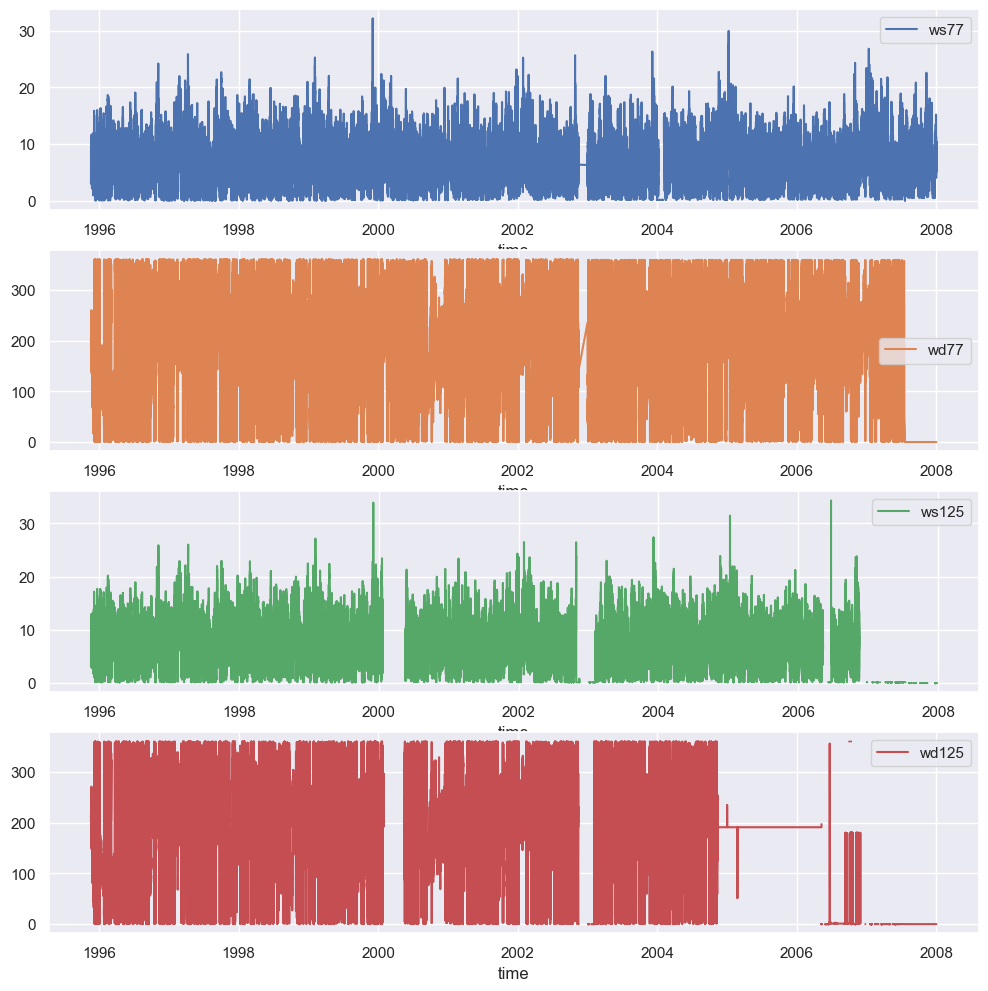

In [5]:
sns.set()
df_mast_risoe.plot(subplots=True, layout=(4,1), figsize=(12,12), sharex=False, sharey=False)

We chose to use height 77 to have more data points to work with.


In [6]:
df_mast_risoe.drop(inplace=True, columns=['wd125', 'ws125'])
df_mast_risoe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 628359 entries, 1995-11-20 16:25:00 to 2007-12-31 23:56:00
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ws77    621607 non-null  float64
 1   wd77    627811 non-null  float64
dtypes: float64(2)
memory usage: 14.4 MB


<Axes: xlabel='wd77'>

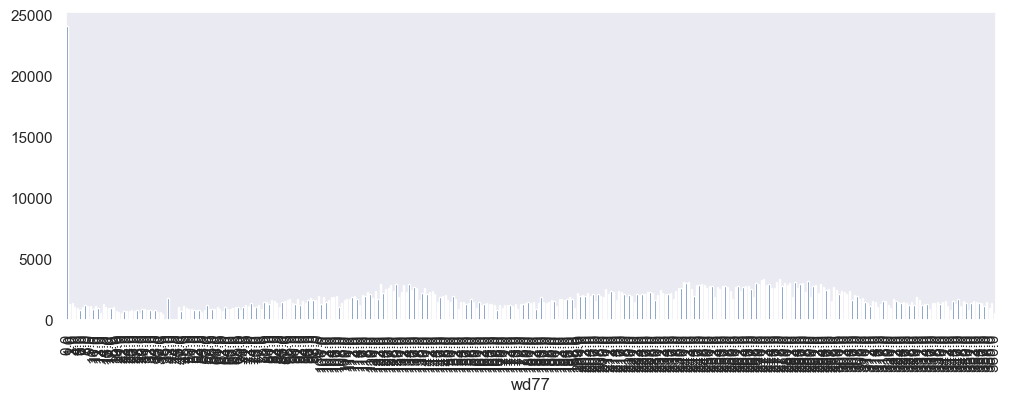

In [7]:
df_mast_risoe['wd77'].value_counts().sort_index().plot(kind='bar', figsize=(12,4), grid=False)

In [8]:

#Remove the last part of data where the wind direction is missing i.e. 0.0 for a long period of time

series = pd.Series(df_mast_risoe['wd77'])
non_zero = series.to_numpy().nonzero()
last_non_zero = non_zero[0][-1]

# remove all values after last non-zero value
df_mast_risoe = df_mast_risoe.iloc[:last_non_zero+1]

Doing a visual inspection of the data again to see results after removing missing values.

array([[<Axes: xlabel='time'>],
       [<Axes: xlabel='time'>],
       [<Axes: xlabel='time'>],
       [<Axes: xlabel='time'>]], dtype=object)

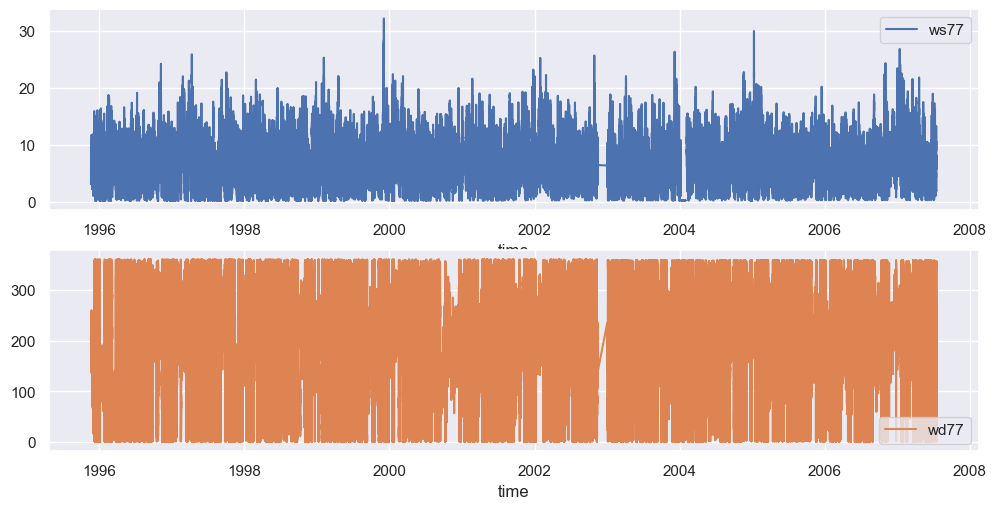

In [9]:
sns.set()
df_mast_risoe.plot(subplots=True, layout=(4,1), figsize=(12,12), sharex=False, sharey=False)

<Axes: xlabel='time'>

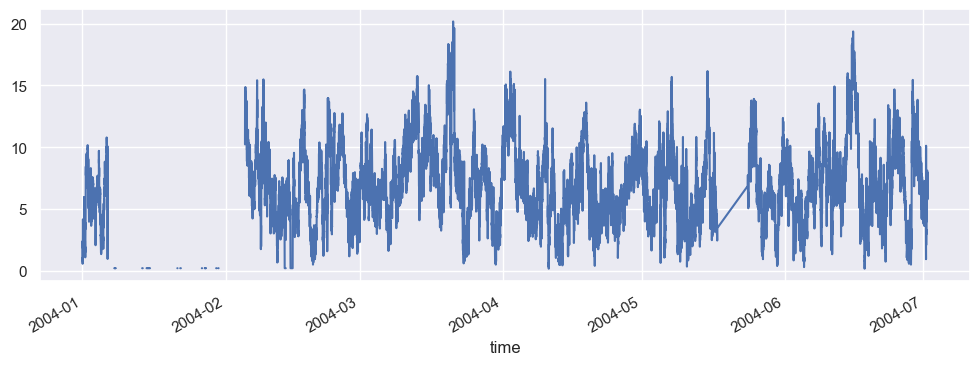

In [10]:
# plot the first 6 months of ws77 from the start of 2004

df_mast_risoe['2004-01-01':'2004-07-01']['ws77'].plot(figsize=(12,4), grid=True)

<Axes: xlabel='wd77'>

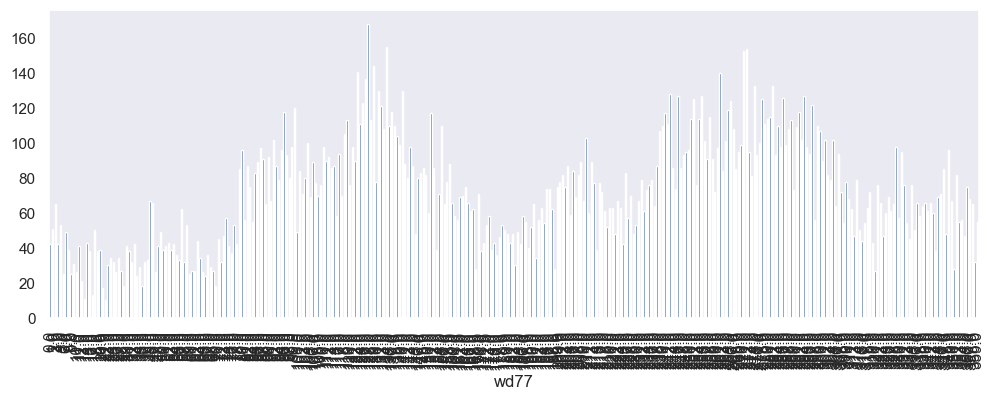

In [11]:
#Trying to display the missing data in a different way. To see if there were a lot of 0.0 measurements, but it is a lot of 0.2 which might still be valid.

df_mast_risoe['2004-01-01':'2004-07-01']['wd77'].value_counts().sort_index().plot(kind='bar', figsize=(12,4), grid=False)

In [12]:
# Showing amount of null values again

df_mast_risoe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 604917 entries, 1995-11-20 16:25:00 to 2007-07-15 23:40:00
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ws77    598165 non-null  float64
 1   wd77    604369 non-null  float64
dtypes: float64(2)
memory usage: 30.0 MB


In [13]:

#Creating placeholder columns for dates to make it possible to do the transformation

df_mast_risoe['date_month_day_hour'] = df_mast_risoe.index.strftime('%m-%d %H')
df_mast_risoe['minute_first_digit'] = df_mast_risoe.index.minute // 10
df_mast_risoe['ws77'].fillna(df_mast_risoe.groupby(['date_month_day_hour', 'minute_first_digit'])['ws77'].transform('mean'), inplace=True)

/var/folders/xj/pqhwvlxn0mb8z0cx1qqkqlwc0000gn/T/ipykernel_30018/1232396546.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mast_risoe['ws77'].fillna(df_mast_risoe.groupby(['date_month_day_hour', 'minute_first_digit'])['ws77'].transform('mean'), inplace=True)


In [14]:
#After the transformation we remove the help columns again
df_mast_risoe.drop(['date_month_day_hour', 'minute_first_digit'], axis=1, inplace=True)



<Axes: xlabel='time'>

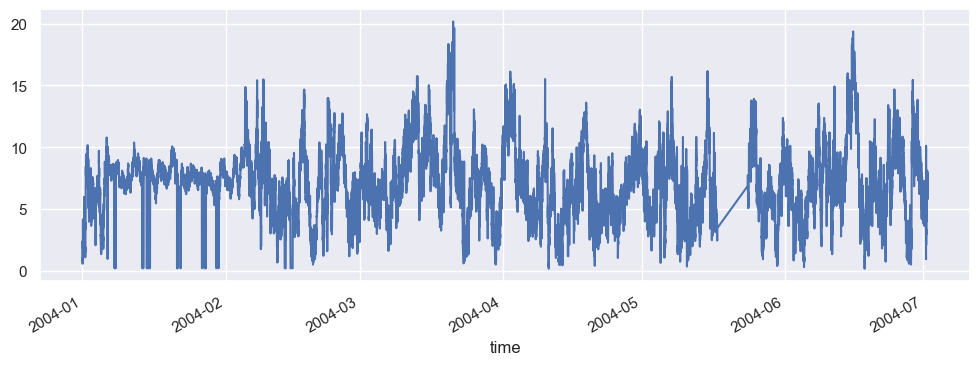

In [15]:


df_mast_risoe['2004-01-01':'2004-07-01']['ws77'].plot(figsize=(12,4), grid=True)

In [16]:
df_mast_risoe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 604917 entries, 1995-11-20 16:25:00 to 2007-07-15 23:40:00
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ws77    604917 non-null  float64
 1   wd77    604369 non-null  float64
dtypes: float64(2)
memory usage: 30.0 MB


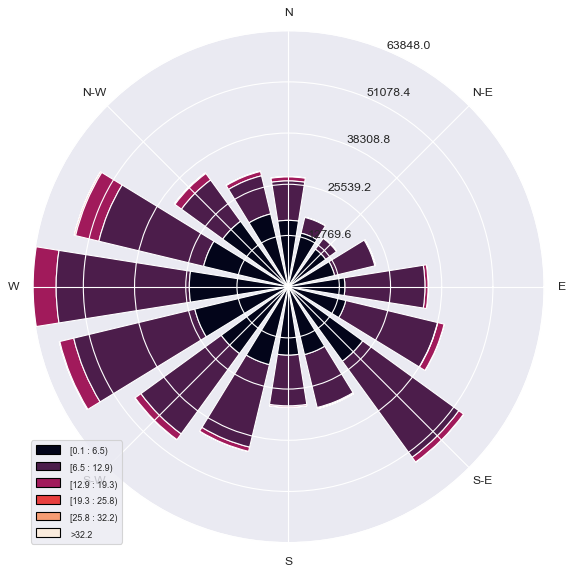

In [17]:
from windrose import WindroseAxes
import matplotlib.pyplot as plt

ws_risoe_77 = df_mast_risoe['ws77'].to_numpy()
wd_risoe_77 = df_mast_risoe['wd77'].to_numpy()

# Plot wind rose
ax = WindroseAxes.from_ax()
ax.bar(wd_risoe_77, ws_risoe_77)
ax.set_legend()

plt.show()

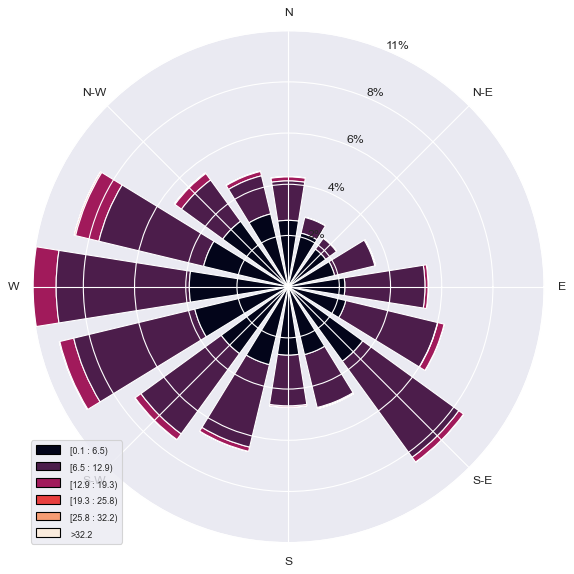

In [18]:
# Plot wind rose
ax = WindroseAxes.from_ax()
ax.bar(wd_risoe_77, ws_risoe_77, normed=True)
ax.set_legend()

# Format radius axis to percentages
fmt = '%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)

plt.show()

MESO DATA Begins here.

In [23]:
import pandas as pd
import numpy as np

# Specify the path to the CSV file
file_path = 'Data/Risoe/meso_Risoe.csv'

# Load the CSV data into a pandas DataFrame
dataset = pd.read_csv(file_path)

columns_to_keep = ['WSP080', 'WDIR080', 'TIMESTAMP']
dataset_filtered = dataset[columns_to_keep]

# Display the last 25 rows to confirm data is loaded correctly
print(dataset_filtered.tail(25))


        WSP080  WDIR080            TIMESTAMP
204263    4.66   176.55  2020-09-23 12:00:00
204264    7.00   210.90  2020-09-23 13:00:00
204265    5.94   222.90  2020-09-23 14:00:00
204266    5.50   223.79  2020-09-23 15:00:00
204267    5.50   219.43  2020-09-23 16:00:00
204268    6.30   209.41  2020-09-23 17:00:00
204269    7.30   201.52  2020-09-23 18:00:00
204270    8.22   186.66  2020-09-23 19:00:00
204271    9.09   175.47  2020-09-23 20:00:00
204272    9.22   181.10  2020-09-23 21:00:00
204273    8.25   198.38  2020-09-23 22:00:00
204274    7.57   197.73  2020-09-23 23:00:00
204275    6.94   194.47  2020-09-24 00:00:00
204276    7.64   184.48  2020-09-24 01:00:00
204277    8.63   175.45  2020-09-24 02:00:00
204278    8.75   171.30  2020-09-24 03:00:00
204279    9.25   174.10  2020-09-24 04:00:00
204280    9.47   181.95  2020-09-24 05:00:00
204281    9.50   188.36  2020-09-24 06:00:00
204282    9.90   208.58  2020-09-24 07:00:00
204283    9.30   214.93  2020-09-24 08:00:00
204284    